In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('OrdinalDrop1.csv')
ordinal.shape

(2579, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2579, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9902138569960647

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9902138569960647

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9902138569960647

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9900131314412683

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9900131314412683

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe489637d60>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9900131314412683

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.12189507, 4.15768099, 4.21082067, 4.18980408, 4.11010194]),
 'score_time': array([0.00391674, 0.0034039 , 0.00464201, 0.00351286, 0.00485778]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b0f19a0>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b0ecb50>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.14990902, 5.16169   , 5.16097999, 5.25533485, 5.20881891]),
 'score_time': array([0.0048492 , 0.00576115, 0.00336385, 0.00497508, 0.00462413]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe43814b9d0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe4896d1d30>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.19082212, 5.36713505, 5.18355179, 5.26920986, 5.25149202]),
 'score_time': array([0.003371  , 0.00340676, 0.0048449 , 0.0033741 , 0.00341511]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe438146bb0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe448fdcbe0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.21958089, 5.18169498, 5.18556118, 5.37880325, 5.33066177]),
 'score_time': array([0.00336003, 0.00336528, 0.00342202, 0.0034771 , 0.00414324]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b155bb0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe468620e80>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe468620e20>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.25316405, 5.20608115, 5.1763463 , 5.18753409, 5.17071414]),
 'score_time': array([0.00341558, 0.00343966, 0.00486398, 0.00336695, 0.00341105]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b12acd0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe448fcbfa0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b155df0>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.19902897, 5.2346828 , 5.18071604, 5.17737007, 5.16605783]),
 'score_time': array([0.00338984, 0.00340009, 0.00339103, 0.00488782, 0.00340605]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b131910>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe49b131760>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe46861f1c0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,5.816559,0.007612,0.931308
1,6.052403,0.010449,0.946897
2,6.059371,0.006147,0.946280
3,5.842864,0.009979,0.911824
4,5.954014,0.008256,0.949900
5,5.953690,0.006261,0.933133
6,9.472854,0.024860,0.929582
7,5.995898,0.009530,0.926053
8,4.540475,0.006405,0.950737
9,7.450748,0.004578,0.939564


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.929042,0.002340,0.908753
1,0.924345,0.002293,0.939744
2,0.929120,0.002185,0.936716
3,0.927290,0.002303,0.895961
4,0.935857,0.002141,0.937107
5,0.923793,0.002294,0.915868
6,0.912329,0.002396,0.923176
7,0.923010,0.002337,0.919474
8,0.877485,0.002369,0.941296
9,0.881582,0.002156,0.921069


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,12.942139,0.008123,0.926286
1,9.787488,0.007341,0.947589
2,13.457142,0.005969,0.945496
3,12.781080,0.010756,0.905740
4,13.278922,0.012185,0.950007
5,9.840094,0.007833,0.929574
6,9.656591,0.007615,0.933765
7,9.744078,0.011176,0.925759
8,11.923854,0.003976,0.950280
9,11.813298,0.004968,0.931964


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,11.314263,0.008897,0.926286
1,10.335962,0.005756,0.947589
2,14.264195,0.007016,0.945496
3,9.962381,0.005977,0.905740
4,10.040224,0.011182,0.950007
5,14.251520,0.008397,0.929574
6,10.094134,0.013034,0.933765
7,10.296560,0.009102,0.925759
8,12.480654,0.005340,0.950280
9,12.272858,0.017281,0.931964


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,11.296512,0.015344,0.926286
1,11.445473,0.008115,0.947589
2,11.671762,0.025534,0.945496
3,11.536422,0.041788,0.905740
4,11.118458,0.013456,0.950007
5,11.768068,0.021876,0.929574
6,11.363307,0.013233,0.933765
7,11.631873,0.014987,0.925759
8,10.998156,0.008784,0.950280
9,10.964866,0.007112,0.931964


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,13.195023,0.015730,0.923769
1,13.175682,0.017295,0.948160
2,13.230012,0.017773,0.943670
3,10.011720,0.006252,0.906592
4,13.326217,0.008012,0.949078
5,13.243997,0.008375,0.928476
6,13.363847,0.007792,0.933644
7,13.303942,0.006955,0.925781
8,9.621861,0.008083,0.950220
9,10.644201,0.005199,0.934893


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,11.189118,0.011019,0.923769
1,11.501135,0.015820,0.948160
2,12.399318,0.006740,0.943670
3,12.183448,0.013223,0.906592
4,11.149434,0.015797,0.949078
5,11.372678,0.010982,0.928476
6,11.096299,0.015407,0.933644
7,13.357670,0.007800,0.925781
8,12.478805,0.005711,0.950220
9,12.270501,0.015971,0.934893


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,11.049064,0.008549,0.923769
1,11.126560,0.013335,0.948160
2,11.351487,0.005945,0.943670
3,10.875689,0.012673,0.906592
4,11.234730,0.008395,0.949078
5,14.297317,0.008431,0.928476
6,11.293797,0.010169,0.933644
7,11.161235,0.014717,0.925781
8,11.423317,0.004911,0.950220
9,9.832967,0.006524,0.934893


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.931308,0.908753,0.926286,0.926286,0.926286,0.923769,0.923769,0.923769
1,0.946897,0.939744,0.947589,0.947589,0.947589,0.948160,0.948160,0.948160
2,0.946280,0.936716,0.945496,0.945496,0.945496,0.943670,0.943670,0.943670
3,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
4,0.949900,0.937107,0.950007,0.950007,0.950007,0.949078,0.949078,0.949078
5,0.933133,0.915868,0.929574,0.929574,0.929574,0.928476,0.928476,0.928476
6,0.929582,0.923176,0.933765,0.933765,0.933765,0.933644,0.933644,0.933644
7,0.926053,0.919474,0.925759,0.925759,0.925759,0.925781,0.925781,0.925781
8,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220
9,0.939564,0.921069,0.931964,0.931964,0.931964,0.934893,0.934893,0.934893


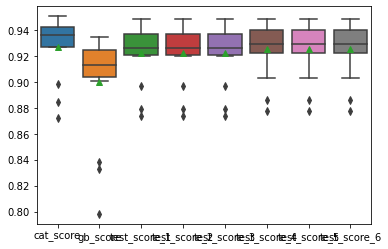

In [72]:
sns.boxplot(data=combo, showmeans=True);

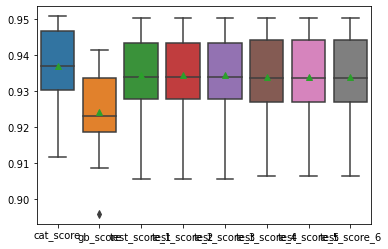

In [71]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220
